# Tutorial: Coupled Climate Networks

The objective of this tutorial is to introduce *coupled climate subnetwork analysis*, which uses *interacting networks* in order to study the statistical relationships between several fields of climatological observables or between a climatolical obervable at different vertical levels. First, some theoretical background on *interacting networks* is given and the method of *coupled climate network analysis* is explained. Then, some methods provided by **pyunicorn** are illustrated by the example of the Earth's atmosphere’s vertical dynamical structure. An introduction to (single layer) *climate networks* and their application with the pyunicorn package can be found in  the tutorial [Climate Networks](https://github.com/pik-copan/pyunicorn/blob/master/notebooks/tutorial_ClimateNetworks.ipynb). For a detailed discussion and further references, please consult [Donges et al., 2015](https://aip.scitation.org/doi/10.1063/1.4934554) and [Donges et al., 2011](https://link.springer.com/article/10.1140/epjb/e2011-10795-8), on which this tutorial is based.

## Introduction

*Coupled Climate Networks* is a very useful tool for representing and studying the statictical relationship between different climatological variables or between a single variable at different physically separable levels. This can be useful for finding spatial as well as temporal patterns accounting for a large fraction of the fields' variance. The method can also be applied to study the complex interactions between different domains of the Earth system, e.g. the atmosphere, hydrosphere, cryosphere and biosphere, which still remains a great challenge for modern science. The urge to make progress in this field is particularly pressing as substantial and mutually interacting components of the Earth system (tipping elements), may soon pass a bifurcation point (tipping point) due to global climate change.

Mapping the complex interdependency structure of subsystems, components or processes of the Earth system to a network of interacting networks provides a natural, simplified and condensed mathematical representation.

## Theory of Interacting Networks

The structure of many complex systems can be described as a *network of interacting or interdependent networks*. Notable examples are representations of the mammalian cortex, systems of interacting populations of heterogeneous oscillators or mutually interdependent infrastructure networks. 

**Pyunicorn** provides the class `core.InteractingNetworks`for constructing and analysing all kinds of interacting networks. *Coupled climate networks* applies *interacting networks* to *climate networks*. The class `climate.CoupledClimateNetworks`of pyunicorn inherits from `core.InteractingNetworks` and `climate.ClimateNetworks`.

*Interacting networks* can be represented by decomposing a network $G=(V,E)$ into a collection of *M subnetworks* 
$G_i=(V_i,E_{ii})$. Here, $V_i$ denote the disjunct sets of nodes corresponding to each subnetwork and the internal links 
sets $E_{ii}$ contain information on the connections within a subnetwork such that $\cup^M_{i=1}V_i=V$.
Additionally, disjunct sets of cross-links $E_{ij}$ connect nodes in different subnetworks with $\cup^M_{i,j=1}E_{ij}=E$. 
Alternatively, a network of networks of this type can be represented by a standard adjacency matrix $A$ with   with block structure.

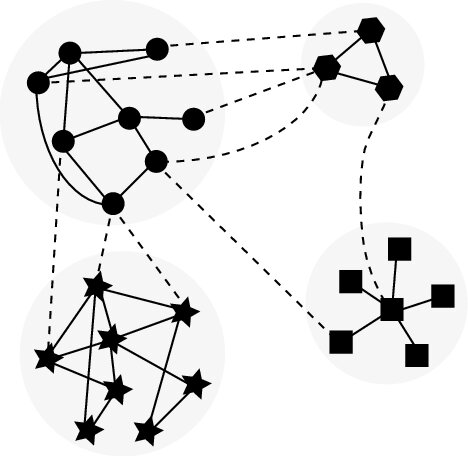

In the following, we introduce some local and global measures for interacting networks. 

The indices $i,j,k,l$ always denote subnetworks while $v,w,p,q$ designate single vertices and we always assume $v\in V_i$. The formulae explicitely account
for the general case $i \ne j$ but can be, nevertheless, easily modified to suit the special case $i = j$. Furthermore, the term *cross* refers to the interaction between subnetworks $G_i,G_j$, whereas *internal* refers to the structure within a singular subnetwork.

### Local Measures

The **cross-degree centrality** $k_v^{ij}$ gives the number of neighbours of the vertex $v$ within subnetwork $G_j$,
$$k_v^{ij}=\sum_{q\in V_j}A_{vq},v \in V_i.$$

The **cross-closeness centrality** $c^{ij}_v$ measures the topological closeness of $v$ to subnetwork $G_j$ along shortest paths,
$$ c^{ij}_v = \frac{N_j}{\sum_{q\in V_j}d_{vq}},$$
where $d_{vq}$ is the shortest path length between vertices $v$ and $q$. 

For any vertex $w \in V$, the **cross-betweenness centrality** $b^{ij}_w$ indicates its role for mediating interactions between two subnetworks $G_i$ and $G_j$,
$$ b^{ij}_w= \sum_{p\in V_i,q \in V_j;p,q\ne w}\frac{\sigma_{pq}(w)}{\sigma_{pq}}= b^{ji}_w,$$
where $\sigma_{pq}$ denotes the total number of shortest paths from $p \in V_i $ to $q \in V_j$ that include $w$.

### Global Measures

The **cross-edge density** $\rho_{ij}$ measures the density of connections between distinct subnetworks $G_i$ and $G_j$,
$$ \rho_{ij}=\frac{|E_{ij}|}{N_i N_j}= \rho_{ji},$$
where $N_i$ denotes the number of vertices in the subnetwork $G_i$.

The **cross-average path length** $\mathcal{L}_{ij}$ measures the average length of existing shortest paths between two subnetworks $G_i$ and $G_j$,
$$ \mathcal{L}_{ij}= \frac{1}{N_i N_j - M_{ij}}\sum_{v\in V_i,q\in V_j}d_{vq}= \mathcal{L}_{ji}, $$
where $M_{ij}$ is the nnumber of pairs ($v\in V_i$, $q\in V_j$) which are not mutually reachable.

The **global cross-clustering coefficient** $\mathcal{C}_{ij}$ is an estimate of the probability of vertices from subnetwork $G_i$ to have mutually connected neghbors within subnetwork $G_j$,
$$ \mathcal{C}_{ij} = \langle \mathcal{C}^{ij}_v \rangle_{v\in V_i} = \frac{1}{N_i}\sum_{v\in V_i, k_v^j>1}\frac{\sum_{p\ne q \in V_j}A_{vp}A_{pq}A_{qv}}{\sum_{p \ne  q \in V_j}A_{vp}A_{vq}}.$$

The **cross-transitivity** $\mathcal{T}_{ij}$ is the probability that two vertices in subnetwork $G_j$ are connected if they have a common neighbour in subnetwork $G_i$,
$$ \mathcal{T}_{ij}= \frac{\sum_{v\in V_i;p\ne q \in V_j}A_{vp}A_{pq}A_{qv}}{\sum_{v\in V_i;p\ne q \in V_j}A_{vp}A_{vq}}.$$

## Application: Analysing the vertical dynamical structure of the Earth’s atmosphere

In the following, coupled climate network analysis is illustrated by the example of the dynamical structure of the Earth's atmosphere. 

In order to treat a climate network as a network of networks, an ab initio physical separation of the climatological fields is necessary regarding processes responsible for internal coupling within a single field and those mediating interactions between both fields.

For the Earth system, there are distinct physical processes behind vertical and quasi-horizontal atmospheric dynamics: we have a stable isobaric quasi-horizontal stratification, while local heating of the Earth’s surface and atmosphere induces minor disturbances of the system. Therefore, we can treat the considered climatological field variable at different isobaric quasi-horizontal surfaces of the Earth's atmosphere as separated subnetworks of an interconnected network.

The small vertical disturbances of the system due to convection processes lead to vertical movement resulting in pressure gradients which are balanced by quasi-horizontal geostrophic winds along isobares.

We consider the discretised and vertically resolved geopotential height field $Z^i_v(t)$ sampled at predefined points $v$ on isobaric surfaces $i$ as the climatological field variable to construct coupled climate networks as it reflects global weather and climate dynamics to a good approximation: it captures the dynamics of both the geostrophic wind field as well as convection processes.

We specifically focus on the interaction structure between near ground and upper level atmospheric dynamics, which is particularly interesting as a large portion of the solar forcing driving atmospheric dynamics takes place on the Earth’s surface.

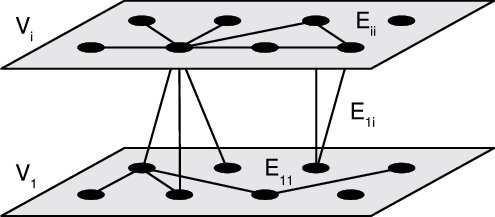

## Loading the Climate Data

For this tutorial, we use Reanalysis 1 data provided by the National Center for Environmental Prediction/ National Center for Atmospheric Research (NCEP/-NCAR). You can download the data set following this [link](https://downloads.psl.noaa.gov//Datasets/ncep.reanalysis/Monthlies/pressure/hgt.mon.mean.nc) and copy it to the directory "notebooks" of this script or change the path below. Some information on the data can be found following this [link](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html). The Reanalysis 1 data set contains the monthly averaged geographical height potential for 17 isobaric surfaces $P_i$ of the atmosphere on an equally spaced spherical grid with latitude and longitude resolution of 2.5° x 2.5°.

In [1]:
DATA_FILENAME = "./hgt.mon.mean.nc"

Now we will start with some imports and some specifications regarding the data set.

In [2]:
import numpy as np
from pyunicorn import climate
from matplotlib import pyplot as plt

climate: Package Ngl could not be loaded. Some functionality in class MapPlots might not be available!


In [3]:
FILE_TYPE = "NetCDF"
#  Type of data file ("NetCDF" indicates a NetCDF file with data on a regular
#  lat-lon grid, "iNetCDF" allows for arbitrary grids - > see documentation).
#  For example, the "NetCDF" FILE_TYPE is compatible with data from the IPCC
#  AR4 model ensemble or the reanalysis data provided by NCEP/NCAR.

In [4]:
#  Indicate data source (optional)
DATA_SOURCE = "NCEP-NCAR Reanalysis 1"

In [5]:
#  Name of observable in NetCDF file ("hgt" indicates the monthly mean of the geopotential height
#  in the NCEP/NCAR reanalysis data)
OBSERVABLE_NAME = "hgt"

In [6]:
#  Select a subset in time and space from the data (e.g., a particular region
#  or a particular time window, or both)
# If the boundaries are equal, the data's full range is selected.
# for this tutorial, we choose a window for lattitude and longitude corresponding to North America
WINDOW = {"time_min": 0., "time_max": 0., "lat_min": 45, "lon_min": 80,
          "lat_max": 60, "lon_max": 120} 

In [7]:
#  Indicate the length of the annual cycle in the data (e.g., 12 for monthly
#  data). This is used for calculating climatological anomaly values
#  correctly.
TIME_CYCLE = 12

We will generate a separate `pyunicorn.climate.ClimateData` instance from our data file for each of the 17 vertical levels in order to construct a coupled climate network for each vertical level coupled to the near ground level in the following steps. 

In [8]:
#  Vertical_level indicates the vertical level to be extracted from the
#  data file. Is ignored for horizontal data sets. If None, the first
#  level in the data file is chosen.
#  in the following, we will loop over all 17 levels in order to generate a ClimateData object for each level.
VERTICAL_LEVELS = 17  # number of total vertical levels in the data file

Now we create an numpy array containing 17 Climate Data objects from our data file (one Climate Data object for each vertical level).

In [9]:
# loop over all levels to create a climate data object for each level, needed for constructing coupled climate networks
data = np.array([climate.ClimateData.Load(
        file_name=DATA_FILENAME, observable_name=OBSERVABLE_NAME,
        data_source=DATA_SOURCE, file_type=FILE_TYPE, vertical_level = l,
        window=WINDOW, time_cycle=TIME_CYCLE) for l in range(VERTICAL_LEVELS)])

Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...


One can use the print function on a Climate Data object in order to show some information about the data.

In [10]:
#  Print some information on the data set
data_level0 = data[0]
print(data_level0)

File format: NETCDF4_CLASSIC
Global attributes:
description:  Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
platform: Model
Conventions: COARDS
NCO: 20121012
history: Created by NOAA-CIRES Climate Diagnostics Center (SAC) from the NCEP
reanalysis data set on 07/07/97 by calc.mon.mean.year.f using
/Datasets/nmc.reanalysis.derived/pressure/hgt.mon.mean.nc
from /Datasets/nmc.reanalysis/pressure/hgt.79.nc to hgt.95.nc
Converted to chunked, deflated non-packed NetCDF4 2014/09
title: monthly mean hgt from the NCEP Reanalysis
dataset_title: NCEP-NCAR Reanalysis 1
References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
Variables (size):
level (17)
lat (73)
lon (144)
time (905)
hgt (905)
ClimateData:
Data: 119 grid points, 107695 measurements.
Geographical boundaries:
         time     lat     lon
   min 1297320.0   45.00   80.00
   max 1957656.0   60.00  120.00


## Network construction

The `pyunicorn.climate.CoupledClimateNetwork` class provides the functionality to generate a complex network from the matrix of a similarity measure of time series from two different observables or one observable at two different vertical levels. The idea of coupled climate networks is based on the concept of coupled patterns, for a review refer to [Bretherton1992](https://journals.ametsoc.org/view/journals/clim/5/6/1520-0442_1992_005_0541_aiomff_2_0_co_2.xml). The two observables (layers) need to have the same time grid (temporal sampling points). Some information on the construction of a Climate Network based on different similarity measures is provided in the pyunicorn tutorial on [Climate Networks](https://github.com/pik-copan/pyunicorn/blob/master/notebooks/tutorial_ClimateNetworks.ipynb).

For our example, we contruct 17 coupled climate networks (coupling the lowest level with each other level) from the data based on Pearson correlation without lag and with a fixed threshold. For the construction of a coupled climate network, one needs to set either the threshold $\beta$ or the link denisty. In this example, we set the threshold $\beta = 0.5$.

In [12]:
#  For setting fixed threshold
THRESHOLD = 0.5

In [13]:
#  generate a coupled climate network for each level and the lowest level and calculate some cross network measures.

cross_link_density = []
cross_average_path_length = []
cross_global_clustering = []
cross_transitivity = []

cross_degree = []
cross_closeness = []
cross_betweenness = []

for l in range(VERTICAL_LEVELS): # loop over all vertical levels
    
    # generate a coupled climate network between the ground level and the level l
    coupled_network = climate.CoupledTsonisClimateNetwork(data[0], data[l], threshold = THRESHOLD)
    
    # calculate global measures
    cross_link_density.append(coupled_network.cross_link_density()) # 1 output
    cross_average_path_length.append(coupled_network.cross_average_path_length()) # 1 output
    cross_global_clustering.append(coupled_network.cross_global_clustering()) # 2 outputs
    cross_transitivity.append(coupled_network.cross_transitivity()) # 2 outputs
    
    # calculate local measures
    cross_degree.append(coupled_network.cross_degree()) # pointing upwards and pointing downwards
    cross_closeness.append(coupled_network.cross_closeness()) # pointing upwards, pointing downwards
    cross_betweenness.append(coupled_network.cross_betweenness()) # near ground and upper level component

Calculating daily (monthly) anomaly values...
Calculating correlation matrix at zero lag from anomaly values...
Extracting network adjacency matrix by thresholding...
Setting area weights according to type surface ...
Setting area weights according to type surface ...
Calculating all shortest path lengths...
Calculating daily (monthly) anomaly values...
Calculating correlation matrix at zero lag from anomaly values...
Extracting network adjacency matrix by thresholding...
Setting area weights according to type surface ...
Setting area weights according to type surface ...
Calculating all shortest path lengths...
Calculating daily (monthly) anomaly values...
Calculating correlation matrix at zero lag from anomaly values...
Extracting network adjacency matrix by thresholding...
Setting area weights according to type surface ...
Setting area weights according to type surface ...
Calculating all shortest path lengths...
Calculating daily (monthly) anomaly values...
Calculating correlation 

C:\Users\hotz\AppData\Roaming\Python\Python39\site-packages\pyunicorn\core\interacting_networks.py:965: RuntimeWarning: invalid value encountered in scalar divide
  average_path_length = path_lengths.sum() / norm


Setting area weights according to type surface ...
Calculating all shortest path lengths...
Calculating daily (monthly) anomaly values...
Calculating correlation matrix at zero lag from anomaly values...
Extracting network adjacency matrix by thresholding...
Setting area weights according to type surface ...
Setting area weights according to type surface ...
Calculating all shortest path lengths...
Calculating daily (monthly) anomaly values...
Calculating correlation matrix at zero lag from anomaly values...
Extracting network adjacency matrix by thresholding...
Setting area weights according to type surface ...
Setting area weights according to type surface ...
Calculating all shortest path lengths...
Calculating daily (monthly) anomaly values...
Calculating correlation matrix at zero lag from anomaly values...
Extracting network adjacency matrix by thresholding...
Setting area weights according to type surface ...
Setting area weights according to type surface ...
Calculating all sho

## Plotting some global measures for the coupled networks

Now we plot the global meaures that we calculated for the 17 coupled climate networks in dependence of the average geopotential height of each level. Therefore, we first calculate the average geopotential height for each vertical level in km.

In [14]:
# read out the observable hgt (geopotentential height) and averaging it for each level
hgt_averaged = []
for l in range (VERTICAL_LEVELS):
    hgt_averaged.append(np.round(data[l].observable().flatten().mean()/1000,1))

Cross-link density $ \rho_{ij}=\rho_{ji}$ and cross-average path length $ \mathcal{L}_{ij} =\mathcal{L}_{ji}$ are symmertrical, but global cross-clustering coefficient $\mathcal{C}_{ij} \neq \mathcal{C}_{ji} $ and cross transitivity $\mathcal{T}_{ij} \neq \mathcal{T}_{ij}$ are not.

### Cross link density

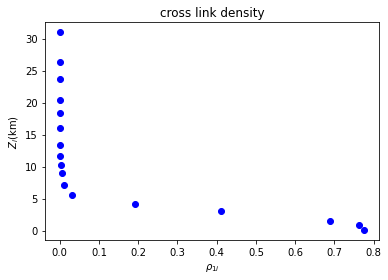

In [15]:
# plot the geopotential height over the cross link density (rho_1i = rho_i1)
plt.plot(cross_link_density, hgt_averaged, 'o', color='blue'); 
plt.xlabel(r"$\rho_{1i}$");
plt.ylabel(r"$Z_i$(km)");
plt.title('cross link density');

### Cross average path length

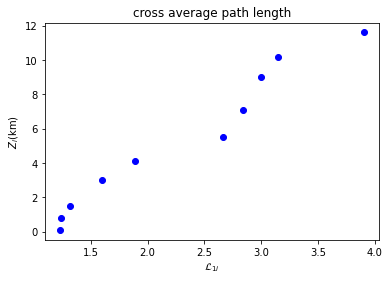

In [16]:
# plot the geopotential height over the cross average path length (L_1i = L_i1)
plt.plot(cross_average_path_length, hgt_averaged, 'o', color='blue'); 
plt.xlabel(r"$\mathcal{L}_{1i}$");
plt.ylabel(r"$Z_i$(km)");
plt.title('cross average path length');

### Global cross clustering coefficient

The global cross clustering coefficient $\mathcal{C}_{ij}$ gives the average probability of vertices from subnetwork $G_i$ to have mutually connected neghbors within subnetwork $G_j$. In general, it is not symmetric. The method `climate.CoupledClimateNetwork.cross_global_clustering()` of two coupled climate subnetworks $G_i$ and $G_j$ returns the tuple $(\mathcal{C}_{ij},\mathcal{C}_{ji})$.

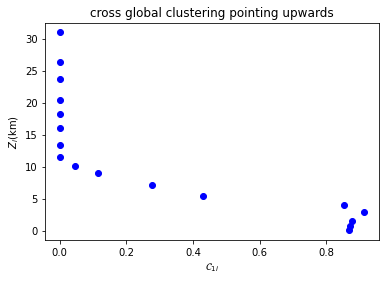

In [17]:
# plot the geopotential height over the cross global clustering pointing upwards C_1i
plt.plot(np.array(cross_global_clustering)[:,0], hgt_averaged, 'o', color='blue'); # C_1i
plt.xlabel(r"$\mathcal{C}_{1i}$");
plt.ylabel(r"$Z_i$(km)");
plt.title('cross global clustering pointing upwards');

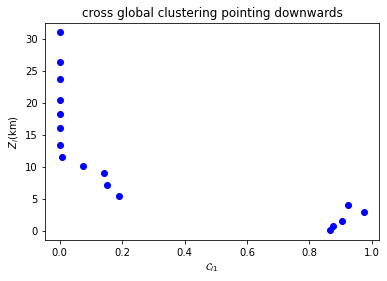

In [18]:
# plot the geopotential height over the cross global clustering pointing downwards C_i1
plt.plot(np.array(cross_global_clustering)[:,1], hgt_averaged, 'o', color='blue'); 
plt.xlabel(r"$\mathcal{C}_{i1}$");
plt.ylabel(r"$Z_i$(km)");
plt.title('cross global clustering pointing downwards');

### Cross transitivity

The global cross transitivity $\mathcal{T}_{ij}$ gives the probability that two vertices in subnetwork $G_j$ are connected if they have a common neighbour in subnetwork $G_i$ . In general, it is not symmetric. The method `climate.CoupledClimateNetwork.cross_global_transitivity()` of two coupled climate subnetworks $G_i$ and $G_j$ returns the tuple $(\mathcal{T}_{ij},\mathcal{T}_{ji})$.

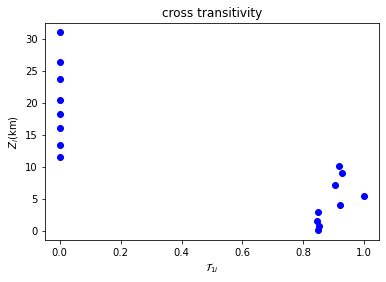

In [19]:
# plot the geopotential height over the cross transitivity pointing upwards T_1i
plt.plot(np.array(cross_transitivity)[:,0], hgt_averaged, 'o', color='blue'); 
plt.xlabel(r"$\mathcal{T}_{1i}$");
plt.ylabel(r"$Z_i$(km)");
plt.title('cross transitivity');

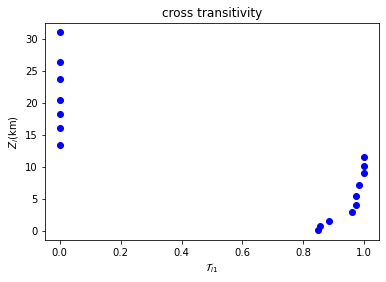

In [20]:
# plot the geopotential height over the cross transitivity pointing downwards T_i1
plt.plot(np.array(cross_transitivity)[:,1], hgt_averaged, 'o', color='blue', label=r"$\mathcal{T}_{i1}$");
plt.xlabel(r"$\mathcal{T}_{i1}$");
plt.ylabel(r"$Z_i$(km)");
plt.title('cross transitivity');

## Plotting some local measures for the coupled networks

Local cross-network measures of `climate.CoupledClimateNetwork` give values for all vertices $v$ of the coupled network in form of a tuple of two numpy arrays where the first entry of the tuple corresponds to the measure for all nodes of the first subnetwork and the second entry for the nodes of the second subnetwork respectively.

For visualising the inherently three-dimensional fields of local cross-network measures $m^{ij}_{v(\vartheta,\phi)}$, where $\vartheta$ and $\phi$ denote latitude and longitude, we choose to focus on their variation with height and latitude. Therefore, we consider zonal averages
$$ m^{ij}(\vartheta)=\langle m^{ij}_{v(\vartheta,\phi)} \rangle _\phi  $$
along circles of constant latitude.

The local measures of vertices of a subnetwork of a coupled climate networks instance are ordered by latitude and longitude in one single numpy array. In order to select the measures of the nodes by latitude and longitude, we need to reshape the single output array into a $N_{\vartheta} \times N_{\phi}$ matrix, where $N_{\vartheta}$ corresponds to the number of lattitude values and $N_{\phi}$ to the number of longitude values.

First, we determine the number of lattitude and longitude values for our example. It is the same for all 17 generated coupled climate networks.

In [27]:
# calculate the number of lon and lat values
print(f'number of lat values: {len(np.unique(coupled_network.grid_1.lat_sequence()))}') 
print(f'number of lon values: {len(np.unique(coupled_network.grid_1.lon_sequence()))}') 

number of lat values: 7
number of lon values: 17


### Cross degree

The method `climate.CoupledClimateNetwork.cross_degree()` of two coupled climate subnetworks $G_i$ and $G_j$ returns the tuple $(\mathbf{k_v^{ij}},\mathbf{k_v^{ji}})$, with $\mathbf{k_v^{ij}}$ being a numpy array containing the non-symmetric cross degree of the vertices.

In [38]:
# cross degree

cross_degree_upwards_zonial = np.zeros((17,7)) # 17 levels and 7 lat values
cross_degree_downwards_zonial =  np.zeros((17,7)) # 17 levels and 7 lat values

for l in range(VERTICAL_LEVELS): # loop over all vertical levels
    
    cd_upwards = np.array(cross_degree[l][0]).reshape(7,17) # k_1l, 7 lat values and 17 lon values
    cd_downwards = np.array(cross_degree[l][1]).reshape(7,17) # k_l1, 7 lat values and 17 lon values
    
    cd_upwards_zonial = cd_upwards.mean(axis=1) # average over lon with same lat
    cd_downwards_zonial = cd_downwards.mean(axis=1) # average over lon with same lat
    
    cross_degree_upwards_zonial[l] = cd_upwards_zonial
    cross_degree_downwards_zonial[l] = cd_downwards_zonial        

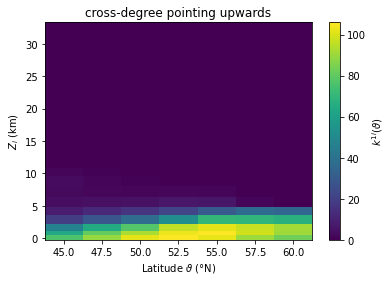

In [122]:
# heat plot for cross degree pointing upwards

lat = np.unique(coupled_network.grid_1.lat_sequence())
hgt = hgt_averaged
X,Y = np.meshgrid(lat,hgt)
Z = cross_degree_upwards_zonial

plt.pcolormesh(X,Y,Z)
plt.colorbar(label=r"$k^{1i}(\vartheta)$")
plt.title('cross-degree pointing upwards')
plt.xlabel(r"Latitude $\vartheta$ (°N)");
plt.ylabel(r"$Z_i$ (km)");
plt.show()

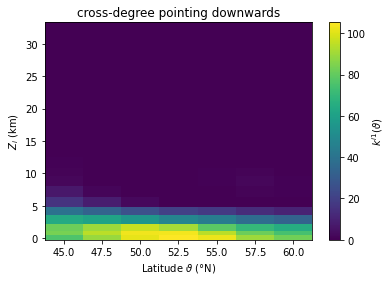

In [123]:
# heat plot for cross degree pointing downwards

lat = np.unique(coupled_network.grid_1.lat_sequence())
hgt = hgt_averaged
X,Y = np.meshgrid(lat,hgt)
Z = cross_degree_downwards_zonial

plt.pcolormesh(X,Y,Z)
plt.colorbar(label=r"$k^{i1}(\vartheta)$")
plt.title('cross-degree pointing downwards')
plt.xlabel(r"Latitude $\vartheta$ (°N)");
plt.ylabel(r"$Z_i$ (km)");
plt.show()

### Cross closeness

The method `climate.CoupledClimateNetwork.cross_closeness()` of two coupled climate subnetworks $G_i$ and $G_j$ returns the tuple $(\mathbf{c_v^{ij}},\mathbf{c_v^{ji}})$, with $\mathbf{c_v^{ij}}$ being a numpy array containing the non-symmetric cross degree of the vertices.

In [62]:
# cross-closeness

cross_closeness_upwards_zonial = np.zeros((17,7)) # 17 levels and 7 lat values
cross_closeness_downwards_zonial =  np.zeros((17,7)) # 17 levels and 7 lat values

for l in range(VERTICAL_LEVELS): # loop over all vertical levels
    
    cc_upwards = np.array(cross_closeness[l][0]).reshape(7,17) # c_1l, 7 lat values and 17 lon values
    cc_downwards = np.array(cross_closeness[l][1]).reshape(7,17) # c_l1, 7 lat values and 17 lon values
    
    cc_upwards_zonial = cc_upwards.mean(axis=1) # average over lon with same lat
    cc_downwards_zonial = cc_downwards.mean(axis=1)
    
    cross_closeness_upwards_zonial[l] = cc_upwards_zonial
    cross_closeness_downwards_zonial[l] = cc_downwards_zonial

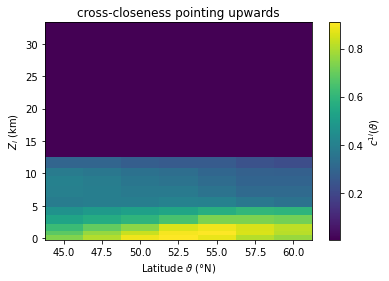

In [125]:
# heat plot for cross closeness pointing upwards
lat = np.unique(coupled_network.grid_1.lat_sequence())
hgt = hgt_averaged
X,Y = np.meshgrid(lat,hgt)
Z = cross_closeness_upwards_zonial

plt.pcolormesh(X,Y,Z)
plt.colorbar(label=r"$c^{1i}(\vartheta)$")
plt.title('cross-closeness pointing upwards')
plt.xlabel(r"Latitude $\vartheta$ (°N)");
plt.ylabel(r"$Z_i$ (km)");
plt.show()

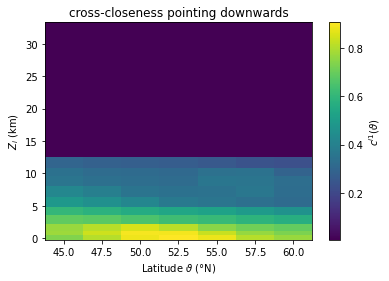

In [126]:
# heat plot for cross closeness pointing downwards
lat = np.unique(coupled_network.grid_1.lat_sequence())
hgt = hgt_averaged
X,Y = np.meshgrid(lat,hgt)
Z = cross_closeness_downwards_zonial

plt.pcolormesh(X,Y,Z)
plt.colorbar(label=r"$c^{i1}(\vartheta)$")
plt.title('cross-closeness pointing downwards')
plt.xlabel(r"Latitude $\vartheta$ (°N)");
plt.ylabel(r"$Z_i$ (km)");
plt.show()

### Cross-betweenness

In contrast to the latter two local measures, cross-betweenness $b^{ij}_w$ with $w\in V_i \cup V_j$ is symmetric with respect
to exchanging the involved subnetworks, but assigns a value to vertices of both subnetworks. Therefore, we will in the following analyse zonally averaged fields of cross-betweenness
$$ b^{ij}_i(\vartheta)=\langle b^{ij}_{w(\vartheta,\phi)}\rangle_{\phi,w\in V_i}$$
for vertices taken from a specific isobaric subnetwork $i$.

In [144]:
# cross betweenness

cross_betweenness_nearground_zonial = np.zeros((17,7)) # 17 levels and 7 lat values
cross_betweenness_upperlevel_zonial =  np.zeros((17,7)) # 17 levels and 7 lat values

for l in range(VERTICAL_LEVELS): # loop over all vertical levels
    
    cb_nearground = np.array(cross_betweenness[l][0]).reshape(7,17) # near ground level, 7 lat values and 17 lon values
    cb_upperlevel = np.array(cross_betweenness[l][1]).reshape(7,17) # upper level, 7 lat values and 17 lon values
    
    cb_nearground_zonial = cb_nearground.mean(axis=1) # average over lon with same lat
    cb_upperlevel_zonial = cb_upperlevel.mean(axis=1) # average over lon with same lat
    
    cross_betweenness_nearground_zonial[l] = cb_nearground_zonial
    cross_betweenness_upperlevel_zonial[l] = cb_upperlevel_zonial

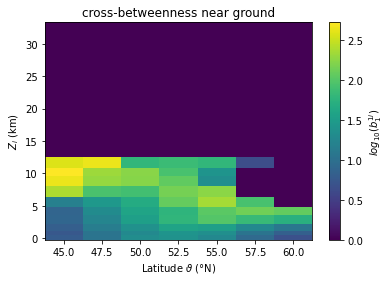

In [145]:
# heat plot for cross betweenness near ground

lat = np.unique(coupled_network.grid_1.lat_sequence())
hgt = hgt_averaged
X,Y = np.meshgrid(lat,hgt)
Z = np.copy(cross_betweenness_nearground_zonial)
Z[Z<1] = 0
Z[Z>1] = np.log10(Z, where = np.greater(Z,np.ones(np.shape(Z))))[Z>1]

plt.pcolormesh(X,Y,Z)
plt.colorbar(label=r"$log_{10}(b_1^{1i})$")
plt.title('cross-betweenness near ground')
plt.xlabel(r"Latitude $\vartheta$ (°N)");
plt.ylabel(r"$Z_i$ (km)");
plt.show()

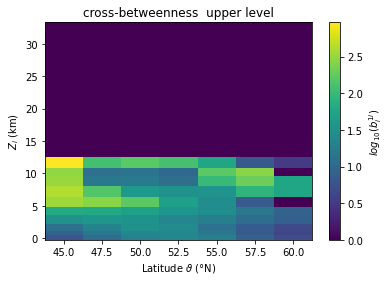

In [147]:
# heat plot for cross betweenness upper level component

lat = np.unique(coupled_network.grid_1.lat_sequence())
hgt = hgt_averaged
X,Y = np.meshgrid(lat,hgt)
z = np.copy(cross_betweenness_upperlevel_zonial)
z[z<1] = 0
z[z>1] = np.log10(z, where = np.greater(z,np.ones(np.shape(z))))[z>1]

plt.pcolormesh(X,Y,z)
plt.colorbar(label=r"$log_{10}(b_i^{1i})$")
plt.title('cross-betweenness  upper level')
plt.xlabel(r"Latitude $\vartheta$ (°N)");
plt.ylabel(r"$Z_i$ (km)");
plt.show()